<h1><center><u>Boston House Price Prediction</u></center></h1>

<font size='3.5'>The problem that I am going to solve in this project is that given a set of features that describes a house in Boston, and the machine lerning model will predict the house price of the house in Boston based on their features. To train the model I am using the scikit-learn's boston dataset.</font>

<font size='3.5'>**Business Case:** Build regression models to predict house price based on various features given</font>

<font size='3.5'>  </font>

<font size='3.5'>  </font>

### Importing the required packages

In [54]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn.datasets
%matplotlib inline

### Importing dataset

In [12]:
boston = sklearn.datasets.load_boston()
ds = pd.DataFrame(boston.data,columns = boston.feature_names)
ds['price'] = boston.target

In [13]:
ds.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,price
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [14]:
#printing the number of rows and columns in dataset

ds.shape

(506, 14)

In [21]:
#Checking for missing values

ds.isnull().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
price      0
dtype: int64

In [23]:
#Printing the summary statistics of the dataset

ds.describe(include='all')

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,price
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [26]:
#Printing the data types of each features

ds.dtypes

CRIM       float64
ZN         float64
INDUS      float64
CHAS       float64
NOX        float64
RM         float64
AGE        float64
DIS        float64
RAD        float64
TAX        float64
PTRATIO    float64
B          float64
LSTAT      float64
price      float64
dtype: object

### Data visualization

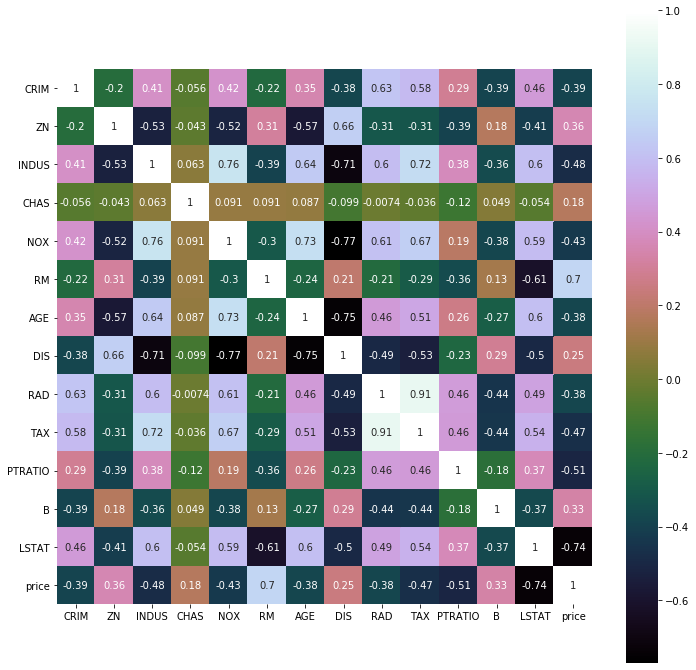

In [44]:
# Visualising the heatmap to see the correlation between different features

plt.figure(figsize=(12,12))
sns.heatmap(ds.corr(),annot=True, cmap = 'cubehelix',square=True)

### Splitting into regressor and response

In [87]:
x = ds.iloc[:,:-1].values
y = ds.iloc[:,-1].values

### Training and test split

In [94]:
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=0)

In [95]:
print(x_train.shape,x_test.shape,y_train.shape,y_test.shape)

(404, 13) (102, 13) (404,) (102,)


### Model Training

#### Linear Regression

In [97]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()

lr.fit(x_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [104]:
print('Intercept: \n',lr.intercept_,'\n\n','Coefficients: \n',lr.coef_)

Intercept: 
 38.09169492630246 

 Coefficients: 
 [-1.19443447e-01  4.47799511e-02  5.48526168e-03  2.34080361e+00
 -1.61236043e+01  3.70870901e+00 -3.12108178e-03 -1.38639737e+00
  2.44178327e-01 -1.09896366e-02 -1.04592119e+00  8.11010693e-03
 -4.92792725e-01]


#### Random Forest regression

In [106]:
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor()

rf.fit(x_train,y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

#### XGBoost Regression

In [111]:
from xgboost import XGBRegressor

xg = XGBRegressor()
xg.fit(x_train,y_train)

XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
             importance_type=None, interaction_constraints='',
             learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
             max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
             missing=nan, monotone_constraints='()', n_estimators=100, n_jobs=0,
             num_parallel_tree=1, objective='reg:squarederror',
             predictor='auto', random_state=0, reg_alpha=0, ...)

### Model Evaluation

In [114]:
from sklearn import metrics

#### Linear regression

In [113]:
y_pred_lr = lr.predict(x_test)

In [121]:
# R squared error
r2_lr = metrics.r2_score(y_test, y_pred_lr)

# Mean Absolute Error
mae_lr = metrics.mean_absolute_error(y_test, y_pred_lr)

#Mean squared error
mse_lr = metrics.mean_squared_error(y_test, y_pred_lr)

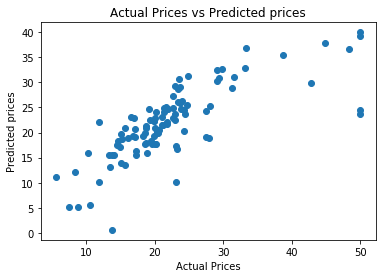

In [125]:
# Visualizing the differences between actual prices and predicted values

plt.scatter(y_test, y_pred_lr)
plt.xlabel("Actual Prices")
plt.ylabel("Predicted prices")
plt.title("Actual Prices vs Predicted prices")
plt.show()

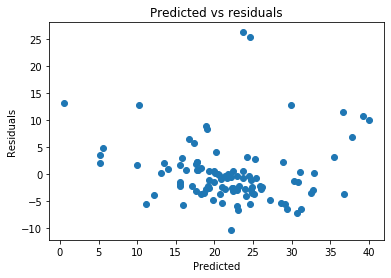

In [126]:
# Visualiz=sing residuals

plt.scatter(y_pred_lr,y_test-y_pred_lr)
plt.title("Predicted vs residuals")
plt.xlabel("Predicted")
plt.ylabel("Residuals")
plt.show()

There is no pattern visible in this plot and values are distributed equally around zero. So Linearity assumption is satisfied

#### Random forest regression

In [134]:
y_pred_rf = rf.predict(x_test)

In [138]:
# R squared error
r2_rf = metrics.r2_score(y_test, y_pred_rf)

# Mean Absolute Error
mae_rf = metrics.mean_absolute_error(y_test, y_pred_rf)

#Mean squared error
mse_rf = metrics.mean_squared_error(y_test, y_pred_rf)

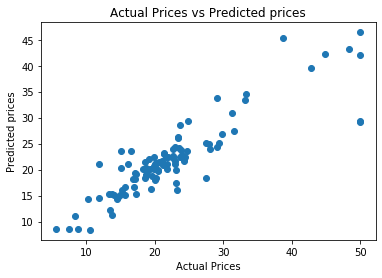

In [139]:
# Visualizing the differences between actual prices and predicted values

plt.scatter(y_test, y_pred_rf)
plt.xlabel("Actual Prices")
plt.ylabel("Predicted prices")
plt.title("Actual Prices vs Predicted prices")
plt.show()

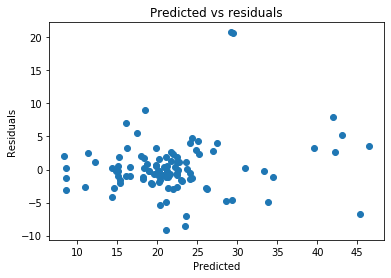

In [140]:
# Visualising residuals

plt.scatter(y_pred_rf,y_test-y_pred_rf)
plt.title("Predicted vs residuals")
plt.xlabel("Predicted")
plt.ylabel("Residuals")
plt.show()

#### XGB regressor

In [142]:
y_pred_xg = xg.predict(x_test)

In [148]:
# R squared error
r2_xg = metrics.r2_score(y_test, y_pred_xg)

# Mean Absolute Error
mae_xg = metrics.mean_absolute_error(y_test, y_pred_xg)

#Mean squared error
mse_xg = metrics.mean_squared_error(y_test, y_pred_xg)

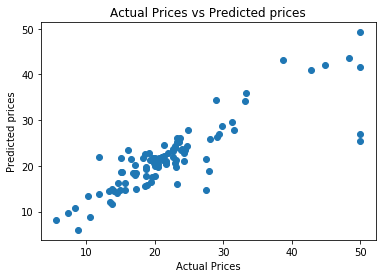

In [144]:
# Visualizing the differences between actual prices and predicted values

plt.scatter(y_test, y_pred_xg)
plt.xlabel("Actual Prices")
plt.ylabel("Predicted prices")
plt.title("Actual Prices vs Predicted prices")
plt.show()

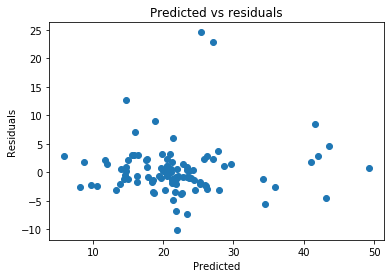

In [145]:
# Visualiz=sing residuals

plt.scatter(y_pred_xg,y_test-y_pred_xg)
plt.title("Predicted vs residuals")
plt.xlabel("Predicted")
plt.ylabel("Residuals")
plt.show()

### Comparison of all the models

In [146]:
models = pd.DataFrame({
    'Model': ['Linear Regression', 'Random Forest', 'XGBoost',],
    'R-squared Score': [r2_lr, r2_rf, r2_xg],
    'Mean Absolute Error' :[mae_lr, mae_rf, mae_xg],
    'Mean Squared Error' :[mse_lr, mse_rf, mse_xg]
})
models.sort_values(by='R-squared Score', ascending=False)

,Model,R-squared Score,Mean Absolute Error,Mean Squared Error
1,Random Forest,0.782040,2.630618,17.748149
2,XGBoost,0.737598,2.796176,21.366958
0,Linear Regression,0.589222,3.842909,33.448980


When comparing the **r2-score** the **random forest model** is giving the higher accuracy of 0.782 when compared with other two models. Similarly when comparing the **mean absolute and mean squared error** **Random forest regression model** is giving the less accuracy than the other two models.

Hence Random Forest Regression works best for this dataset